In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic68/titanic.csv


In [2]:
df = pd.read_csv('/kaggle/input/titanic68/titanic.csv')

# Аналитика

In [3]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


смотрим, какие значения записаны в таблице

In [5]:
df['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

всего 342 выживших и 549 погибших

In [6]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

в Age - 177 null-значений и в Cabin - 687 null-значений

In [7]:
df.fillna({"Age": df["Age"].median()}, inplace=True)

заполняем null в колонке с возрастом медианным значением

In [8]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
df = df.drop(columns=['PassengerId'])

PassengerId - колонка, которая не имеет отношения к выживанию, поэтому можно удалить.

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


Дальше будем строить графики и смотреть на зависимости между данными

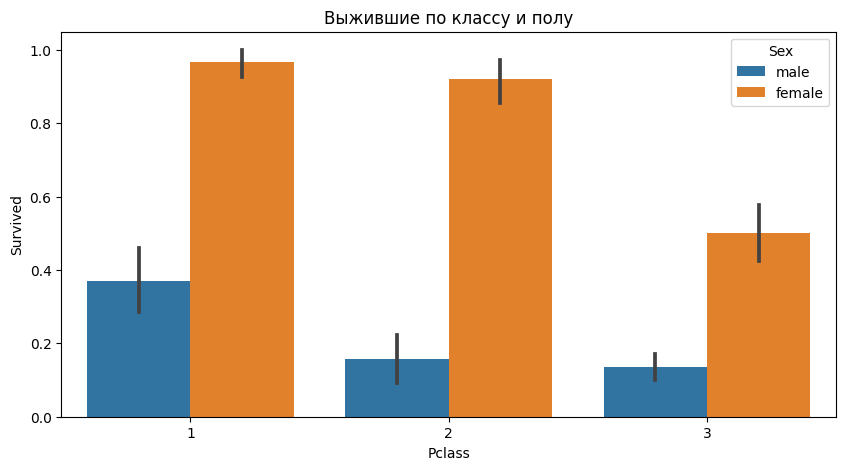

In [11]:
plt.figure(figsize=(10, 5))
sns.barplot(data=df, x='Pclass', y='Survived', hue='Sex')
plt.title('Выжившие по классу и полу')
plt.show()

Пол и класс очень важны, женщины в 1 и 2 классах выжили почти в полном составе

In [12]:
survivors = df.loc[df["Survived"] == 1]
male_survivors = df.loc[(df["Sex"] == "male") & (df["Survived"] == 1)]
female_survivors = df.loc[(df["Sex"] == "female") & (df["Survived"] == 1)]

извлекаем всех выживших, выживших мужчин и выживших женщин

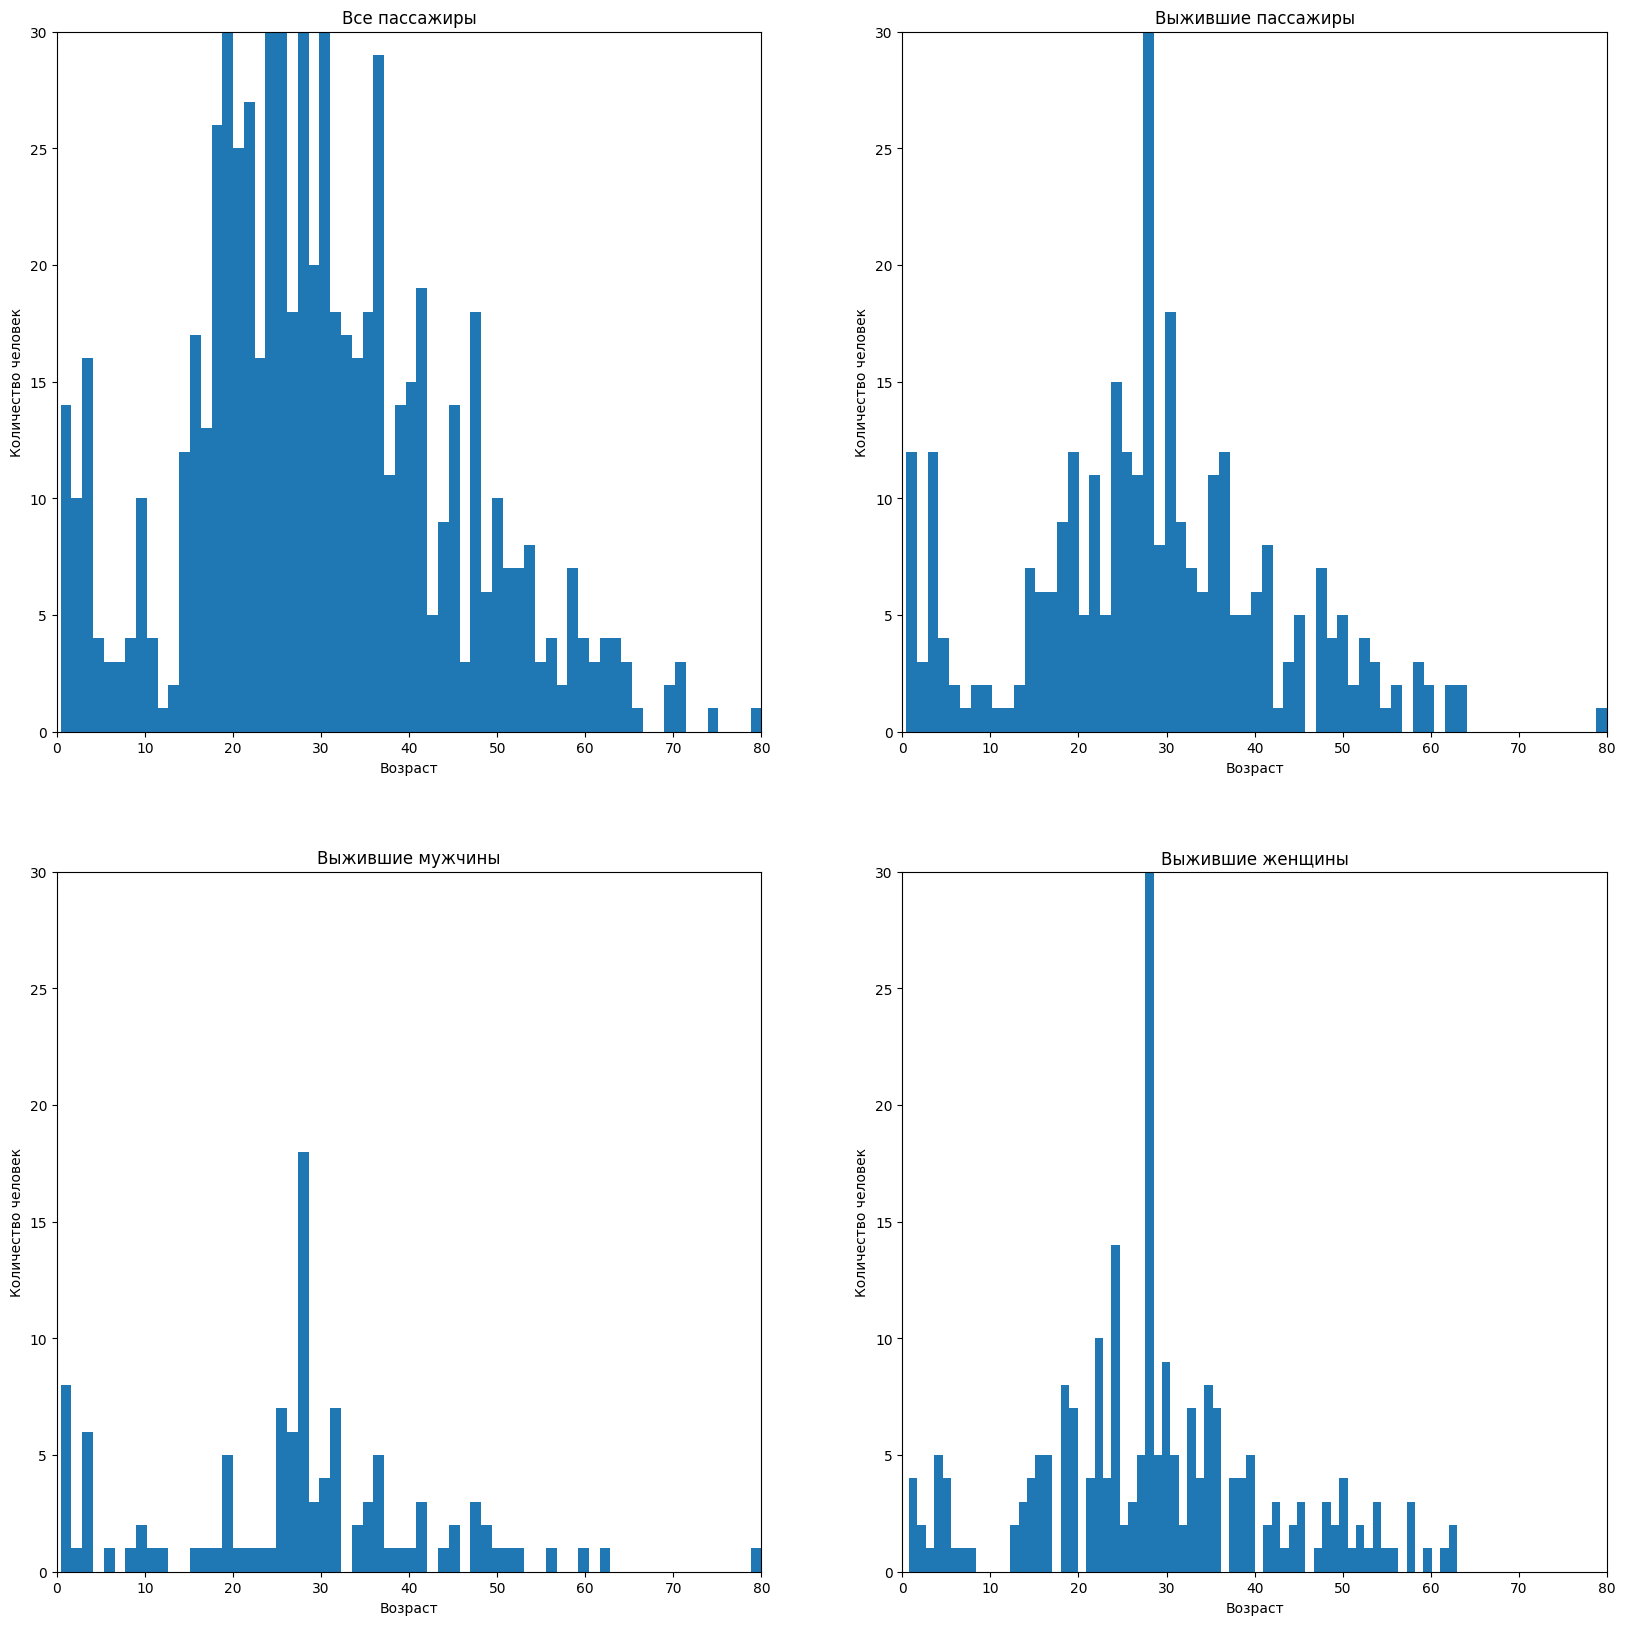

In [13]:
from collections import Counter


fig, axs = plt.subplots(2,2)
fig.set_figwidth(20)
fig.set_figheight(20)
names = [["Все пассажиры", "Выжившие пассажиры"],["Выжившие мужчины", "Выжившие женщины"]]
for i, surv in enumerate([[df, survivors], [male_survivors, female_survivors]]):
    for j, subsurv in enumerate(surv):
        axs[i][j].hist(subsurv["Age"], bins=len(dict(Counter(survivors["Age"])).keys()))
        axs[i][j].set_title(names[i][j])
        axs[i][j].set_xlabel("Возраст")
        axs[i][j].set_ylabel("Количество человек")
        axs[i][j].set_xlim(0,80)
        axs[i][j].set_ylim(0,30)
plt.show()

Видно, что большинство пассажиров были в возрасте от 15 до 40 лет.\
Гипотеза: \
Дети спасались чаще, чем взрослые. 

In [14]:
survivor_rate_by_age = df.loc[df["Survived"] == 1]["Age"].tolist()
ages = df["Age"].tolist()
survivor_rate_by_age = {age: survivor_rate_by_age.count(age)/ages.count(age) for age in survivor_rate_by_age}
survivor_rate_by_age = dict(sorted(survivor_rate_by_age.items(), key=lambda item: -item[1]))
survivor_rate_by_age

{5.0: 1.0,
 0.83: 1.0,
 12.0: 1.0,
 63.0: 1.0,
 0.92: 1.0,
 13.0: 1.0,
 0.75: 1.0,
 53.0: 1.0,
 80.0: 1.0,
 0.67: 1.0,
 0.42: 1.0,
 3.0: 0.8333333333333334,
 15.0: 0.8,
 1.0: 0.7142857142857143,
 4.0: 0.7,
 49.0: 0.6666666666666666,
 48.0: 0.6666666666666666,
 6.0: 0.6666666666666666,
 35.0: 0.6111111111111112,
 27.0: 0.6111111111111112,
 58.0: 0.6,
 14.0: 0.5,
 55.0: 0.5,
 32.0: 0.5,
 32.5: 0.5,
 24.0: 0.5,
 8.0: 0.5,
 50.0: 0.5,
 36.0: 0.5,
 60.0: 0.5,
 52.0: 0.5,
 62.0: 0.5,
 56.0: 0.5,
 31.0: 0.47058823529411764,
 17.0: 0.46153846153846156,
 40.0: 0.46153846153846156,
 42.0: 0.46153846153846156,
 38.0: 0.45454545454545453,
 45.0: 0.4166666666666667,
 22.0: 0.4074074074074074,
 34.0: 0.4,
 29.0: 0.4,
 30.0: 0.4,
 33.0: 0.4,
 54.0: 0.375,
 19.0: 0.36,
 39.0: 0.35714285714285715,
 16.0: 0.35294117647058826,
 18.0: 0.34615384615384615,
 26.0: 0.3333333333333333,
 23.0: 0.3333333333333333,
 44.0: 0.3333333333333333,
 41.0: 0.3333333333333333,
 7.0: 0.3333333333333333,
 2.0: 0.3,
 28.0: 

Возраст очень важен: Дети выживают намного чаще, это видно по вероятности выживания. Гипотеза подтвердилась. 

In [15]:
from sklearn.preprocessing import LabelEncoder
categorical_cols = df.select_dtypes(include=['object']).columns
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

приводим все данные к числовому типу, чтобы модель могла их принять.

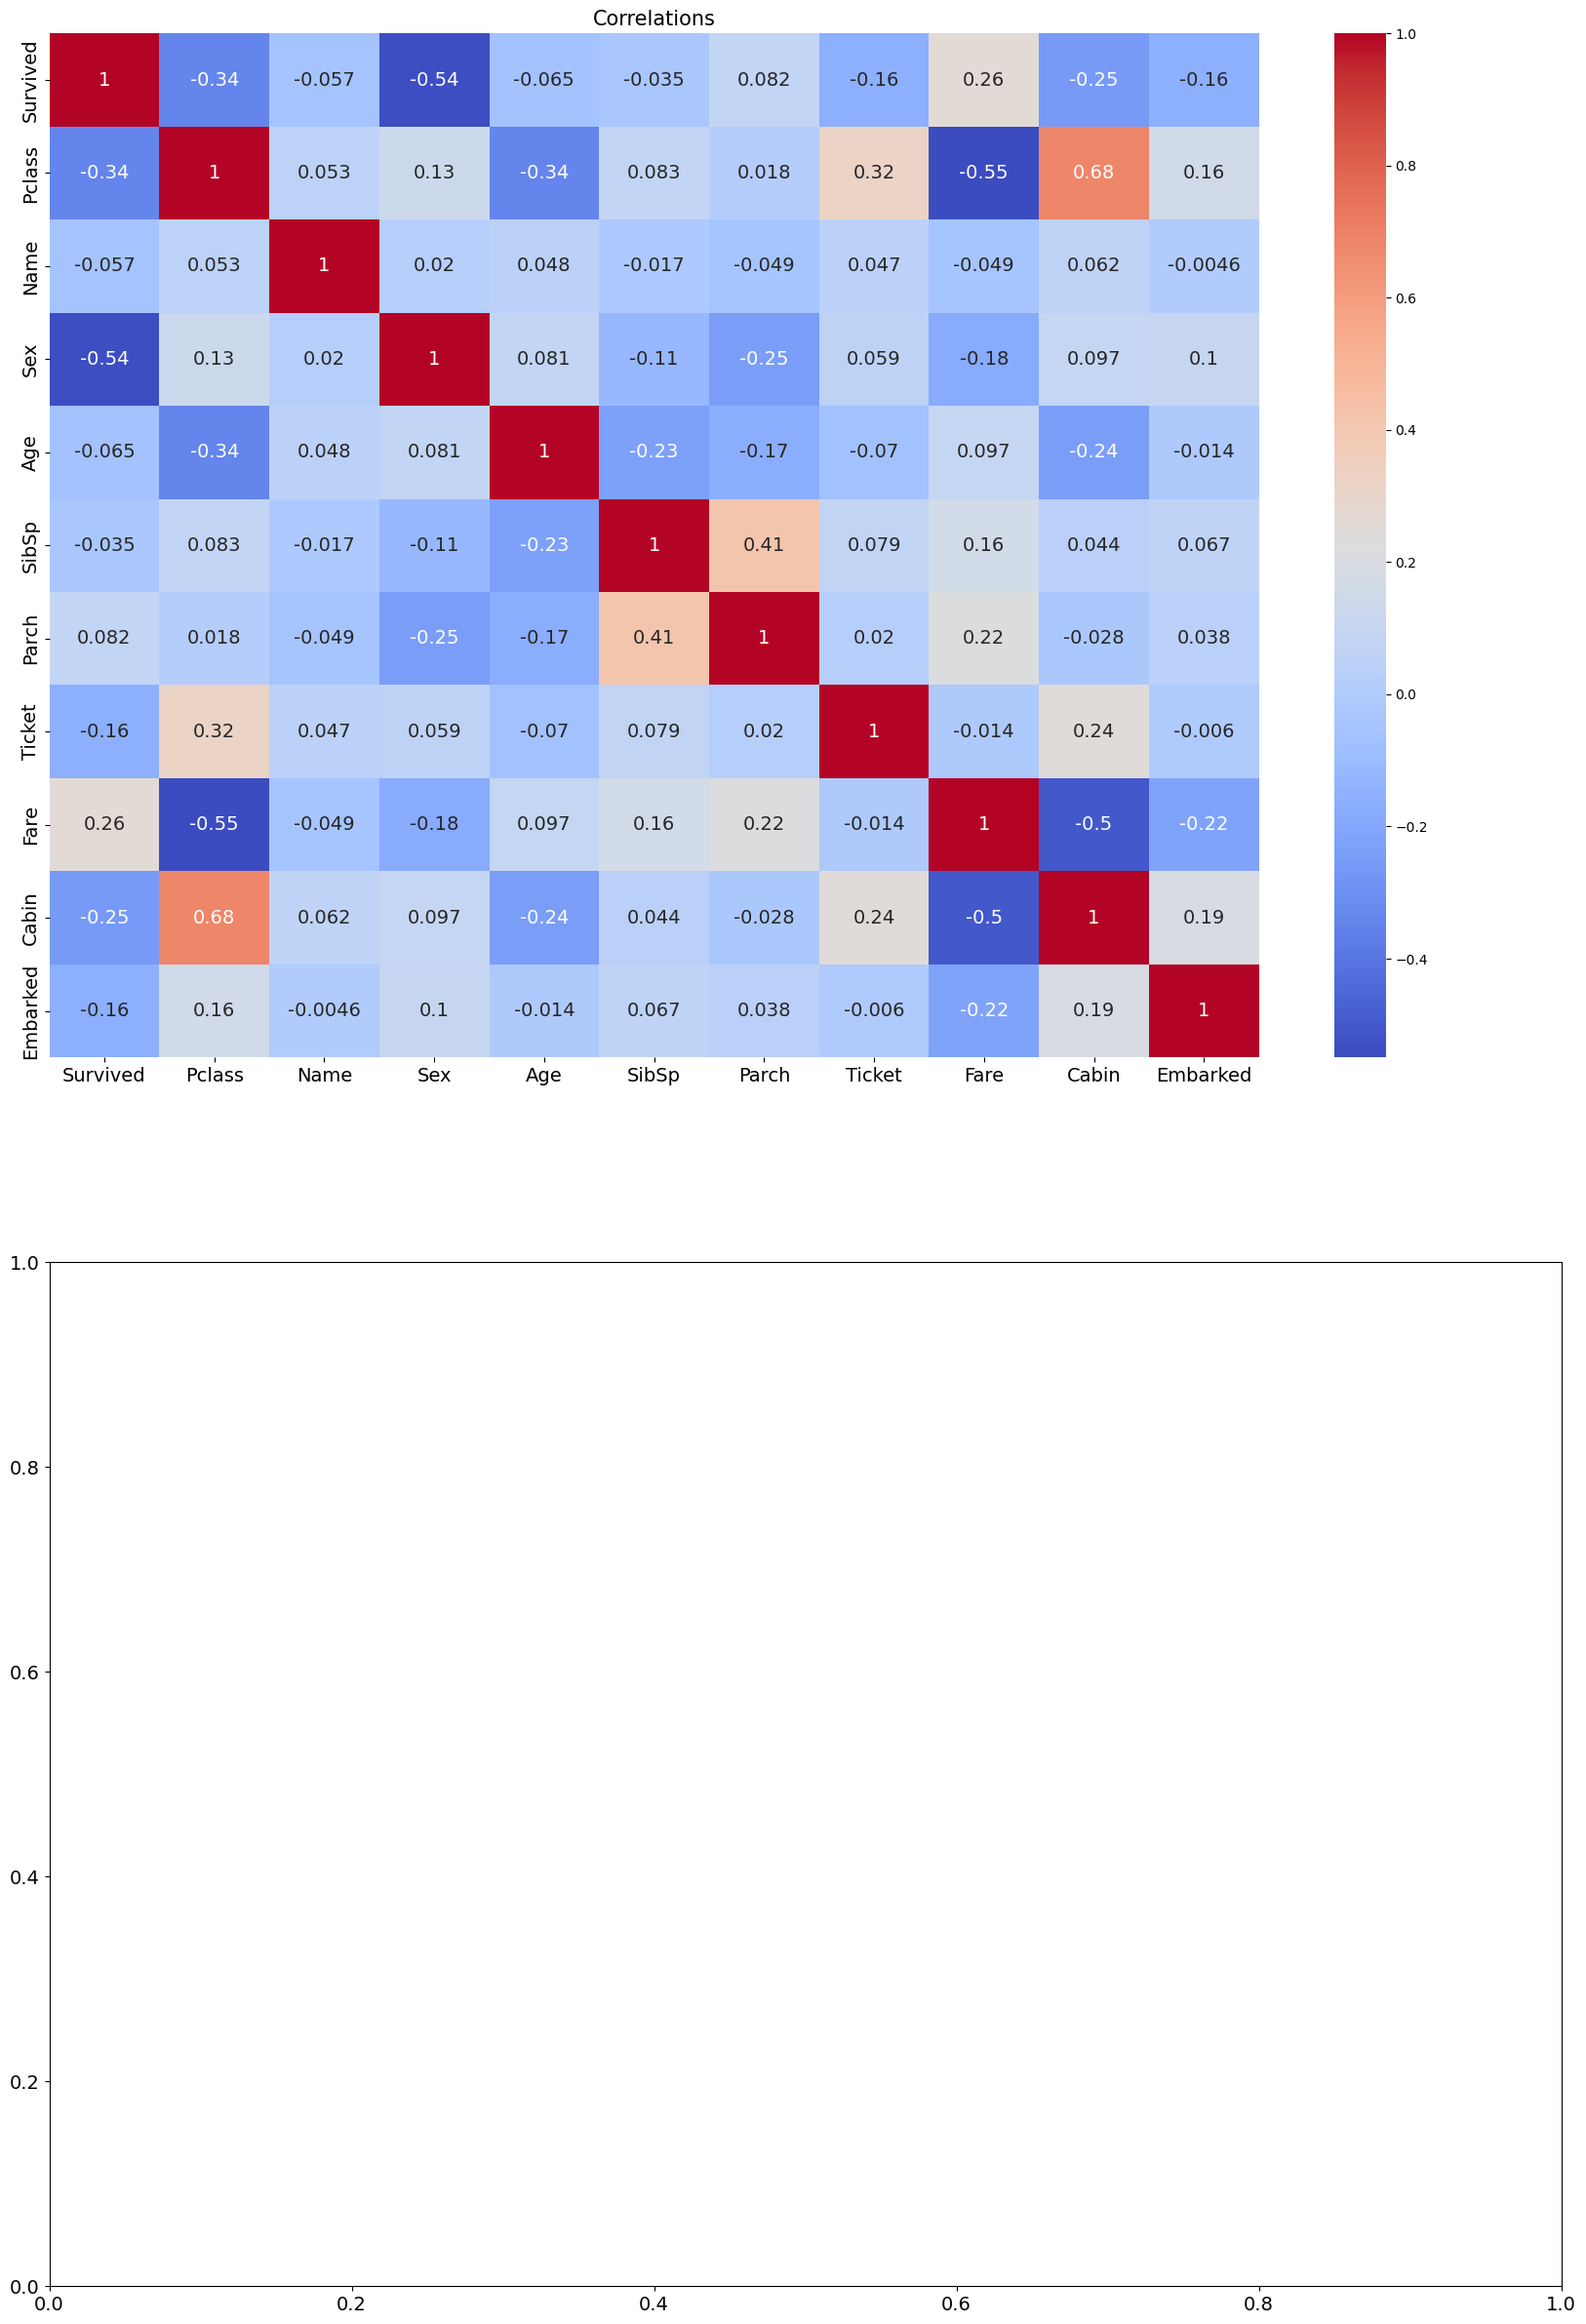

In [16]:
fig, axs = plt.subplots(nrows=2, figsize=(20, 30))

sns.heatmap(df.corr(), ax=axs[0], annot=True, cmap='coolwarm', annot_kws={'size': 14})

for i in range(2):    
    axs[i].tick_params(axis='x', labelsize=14)
    axs[i].tick_params(axis='y', labelsize=14)
    
axs[0].set_title('Correlations', size=15)

plt.show()

Корреляция в виде тепловой карты.

Некритичная корреляция только у PClass и Cabin. У "Cabin" большая корреляция из-за большого количества пропуска данных. 

------------------------------------------------------------

Создаем тестовый и тренировочный df

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

X = df.drop(columns=['Survived'])
y = df['Survived']
                        
X_without_SEPS = df.drop(columns=['Survived', 'Embarked', 'Parch', 'SibSp'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X1_train, X1_test, y_train, y_test = train_test_split(X_without_SEPS, y, test_size=0.2, random_state=42)

исследуем насколько важны 'Survived', 'Embarked', 'Parch', 'SibSp'

# Feature Engineering

In [18]:
clf_rf = RandomForestClassifier()
parameters = {"n_estimators": [25,30,35], "max_depth": [9,11]}
grid_search_cv_clf = GridSearchCV(clf_rf, parameters, cv = 10)
grid_search_cv_clf.fit(X_train, y_train)
grid_search_cv_clf.best_params_

{'max_depth': 9, 'n_estimators': 35}

In [19]:
feature_importance_df = pd.DataFrame({"features":list(X_train),
                                      "feature_importances": grid_search_cv_clf.best_estimator_.feature_importances_})
feature_importance_df.sort_values("feature_importances", ascending=True)

,features,feature_importances
9,Embarked,0.020279
5,Parch,0.022857
4,SibSp,0.034213
0,Pclass,0.076109
8,Cabin,0.078072
3,Age,0.102159
1,Name,0.115956
7,Fare,0.127230
6,Ticket,0.127441
2,Sex,0.295685


Из всех полей менее важны: Embarked, Parch, SibSp.
Попробуем без них

In [20]:
clf_rf1 = RandomForestClassifier()
parameters1 = {"n_estimators": [83, 86, 89], "max_depth": [13, 16, 19]}
grid_search_cv_clf1 = GridSearchCV(clf_rf1, parameters1, cv = 10)
grid_search_cv_clf1.fit(X1_train, y_train)
grid_search_cv_clf1.best_params_

{'max_depth': 16, 'n_estimators': 89}

In [21]:
feature_importance_df = pd.DataFrame({"features":list(X1_train),
                                      "feature_importances": grid_search_cv_clf1.best_estimator_.feature_importances_})
feature_importance_df.sort_values("feature_importances", ascending=True)

,features,feature_importances
0,Pclass,0.058101
6,Cabin,0.076572
3,Age,0.135213
1,Name,0.153995
5,Fare,0.155058
4,Ticket,0.177566
2,Sex,0.243495


In [22]:
print(f"Результат со всеми колонками: {grid_search_cv_clf.best_estimator_.score(X_test, y_test)}")
print()
print(f"Результат без Embarked, Parch, SibSp: {grid_search_cv_clf1.best_estimator_.score(X1_test, y_test)}")

Результат со всеми колонками: 0.8435754189944135

Результат без Embarked, Parch, SibSp: 0.8379888268156425


Результат без Embarked, Parch, SibSp оказался немного лучше

In [23]:
df = df.drop(columns =['Parch', 'Embarked', 'SibSp'])

удалили Embarked, Parch, SibSp

In [24]:
df

,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin
0,0,3,108,1,22.0,523,7.2500,147
1,1,1,190,0,38.0,596,71.2833,81
2,1,3,353,0,26.0,669,7.9250,147
3,1,1,272,0,35.0,49,53.1000,55
4,0,3,15,1,35.0,472,8.0500,147
...,...,...,...,...,...,...,...,...
886,0,2,548,1,27.0,101,13.0000,147
887,1,1,303,0,19.0,14,30.0000,30
888,0,3,413,0,28.0,675,23.4500,147
889,1,1,81,1,26.0,8,30.0000,60


смотрим на получившийся df

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    int64  
 3   Sex       891 non-null    int64  
 4   Age       891 non-null    float64
 5   Ticket    891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Cabin     891 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 55.8 KB


# подготовили df, переходим к созданию модели.

In [26]:
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import Input


# Разбиваем данные на 2 выборки: тестовую и тренировочную
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Стандартизируем данные
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Создаем Sequential модель
model = Sequential()
model.add(Input(shape=(X_train.shape[1],)))
model.add(Dense(64, activation = "exponential")) 
model.add(Dense(1,activation = 'sigmoid' ))

# Компилируем модель
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Тренируем модель
model.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.25)

# Оцениваем модель
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy:.2f}')

Epoch 1/5
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.3391 - loss: 1.2116 - val_accuracy: 0.6067 - val_loss: 0.6747
Epoch 2/5
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6937 - loss: 0.6148 - val_accuracy: 0.7584 - val_loss: 0.5069
Epoch 3/5
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7548 - loss: 0.5292 - val_accuracy: 0.7753 - val_loss: 0.4724
Epoch 4/5
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7814 - loss: 0.5265 - val_accuracy: 0.8034 - val_loss: 0.4539
Epoch 5/5
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7977 - loss: 0.4893 - val_accuracy: 0.7978 - val_loss: 0.4426
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8222 - loss: 0.4344 
Test Accuracy: 0.80


Epoch 1/5
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8024 - loss: 0.4747 - val_accuracy: 0.8202 - val_loss: 0.4340
Epoch 2/5
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7960 - loss: 0.4751 - val_accuracy: 0.8146 - val_loss: 0.4295
Epoch 3/5
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7895 - loss: 0.4778 - val_accuracy: 0.8146 - val_loss: 0.4264
Epoch 4/5
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7840 - loss: 0.4802 - val_accuracy: 0.8146 - val_loss: 0.4237
Epoch 5/5
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8126 - loss: 0.4464 - val_accuracy: 0.8146 - val_loss: 0.4215
Test Accuracy: 0.80


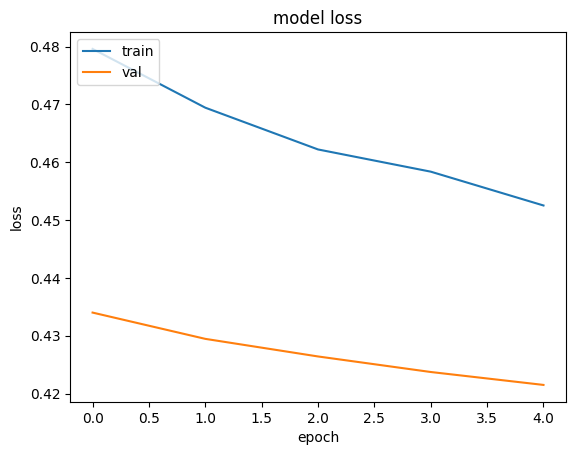

In [27]:
import matplotlib.pyplot as plt
%matplotlib inline
history = model.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.25)
print(f'Test Accuracy: {accuracy:.2f}')
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

Это модель с лучшим loss, остальные модели, которые получались в ходе работы, есть в конце

# проводим кросс-валидацию с 3 фолдами

In [28]:
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix, classification_report


model = Sequential()
model.add(Input(shape=(X_train.shape[1],)))
model.add(Dense(64,activation = 'relu'))
model.add(Dense(1,activation = 'sigmoid' ))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Компилируем модель
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Тренируем модель
history = model.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.25)

# Оцениваем модель
loss, accuracy = model.evaluate(X_test, y_test)


#Создаем KFold с 3 фолдами
kf = KFold(n_splits=3, shuffle=True, random_state=42)
accuracies = []
losses = []
X1 = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns, index=X_train.index)
for train_index, test_index in kf.split(X):
    
    # Разбиваем выборку    
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    history = model.fit(X_train, y_train, 
                        epochs=7, batch_size=32, 
                        validation_data=(X_test, y_test),
                        verbose=0)
    y_pred = model.predict(X_test)    
    if len(accuracies) == 0 or history.history['val_accuracy'][-1] > max(accuracies):
        best_pred = y_pred
    accuracies.append(history.history['val_accuracy'][-1])
    losses.append(history.history['val_loss'][-1])

    # Создаем матрицу потерь
    conf_matrix = confusion_matrix(y_test, (y_pred > 0.5).astype(int))

    # Вводим матрицу потерь
    print("Матрица потерь:")
    print(conf_matrix)

    # Считаем и выводим accuracy, precision, recall, F1-score
    print("\nОтчет о классификации:")
    print(classification_report(y_test, (y_pred > 0.5).astype(int)))
    
best_model_index = np.argmax(accuracies)
print(f"Индекс лучшей моделиь: {best_model_index}")
print(f"Средняя точность: {np.mean(accuracies):.4f}")
print(f"Стандартное отклонение точности: {np.std(accuracies):.4f}")
print(f"Средние потери: {np.mean(losses):.4f}")
print(f"Стандартное отклонение потерь: {np.std(losses):.4f}")

Epoch 1/5
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.6225 - loss: 50.3277 - val_accuracy: 0.5899 - val_loss: 25.3605
Epoch 2/5
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5848 - loss: 19.8261 - val_accuracy: 0.5225 - val_loss: 10.1831
Epoch 3/5
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4755 - loss: 8.5935 - val_accuracy: 0.6348 - val_loss: 4.7859
Epoch 4/5
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6452 - loss: 4.1209 - val_accuracy: 0.6180 - val_loss: 2.6262
Epoch 5/5
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6258 - loss: 2.6997 - val_accuracy: 0.6292 - val_loss: 2.0024
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5791 - loss: 2.1651 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Матрица потерь:
[[ 77 100]
 [ 32  88]]

Отчет о классификации:
              precision    recall  f1-score   support

           0       0.71      0.44      0.54       177
           1       0.47      0.73      0.57       120

    accuracy                   

Теперь в best_pred есть лучшее предсказание нашей модели

Считаем матрицу потерь и Отчет о классификации для тестовых данных

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_pred = model.predict(X_test)

accuracies.append(history.history['val_accuracy'][-1])
losses.append(history.history['val_loss'][-1])

# Создаем матрицу потерь
conf_matrix = confusion_matrix(y_test, (y_pred > 0.5).astype(int))

# Выводим матрицу потерь
print("Confusion Matrix:")
print(conf_matrix)

# Считаем и выводим accuracy, precision, recall, F1-score
print("\nClassification Report:")
print(classification_report(y_test, (y_pred > 0.5).astype(int)))
tn, fp, fn, tp = conf_matrix.ravel()

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Confusion Matrix:
[[95 10]
 [31 43]]

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.90      0.82       105
           1       0.81      0.58      0.68        74

    accuracy                           0.77       179
   macro avg       0.78      0.74      0.75       179
weighted avg       0.78      0.77      0.76       179



In [30]:
print(f"tn: {tn} fp: {fp} fn: {fn} tp: {tp}")

tn: 95 fp: 10 fn: 31 tp: 43


## Итог

В ходе работы мы убрали лишние столбцы с данными, создали sequential модель и научили её с точностью на тестовой выборке 0.7, но, на мой взгляд, результат можно значительно улучшить засчет рассмотрения других моделей машинного обучения.\
Обрабатывая данные был получен вывод,что женщины и дети выживыают чаще, потому что их спасают, а так же, что класс обслуживания имеют огромное значение\

Колонки обрабатывались с помощью Feature Engineering, а после исключались самые незначительные, кроме этого рассматривалась корреляция столбцов PClass и Cabin, которая была вызвана большим количеством null-значений. Аналитика получилась не очень подробной, были рассмотрены не все случаи, скорее всего точность можно улучшить за счет более подробного рассмотрения данных.\

Для лучшей модели была проведена кросс-валидация на 3 фолда, по итогу которой получена статистика прогона по тестовой выборке: средняя точность 0.7, и матрица потерь следующего вида:\
модель предсказала, что погибнут, и по факту погибли = 72 человека\
модель предсказала, что выживут, а по факту погибли =  33 человека\
модель предсказала, что погибнут, а по факту выжили =  21 человек\
модель предсказала, что выживут, и по факту выжили =  53 человека.

В следующих работах постараюсь учесть ошибки и проводить более подробную аналитику и, благодаря этому, результаты улучшатся.

# Прочие модели:

При model.fit(X_train, y_train, epochs=10, batch_size=64, validation_split=0.2)
model = Sequential()
model.add(Input(shape=(X_train.shape[1],)))
model.add(Dense(64,activation = 'relu'))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(8,activation = 'softmax'))
model.add(Dropout(0,2))
model.add(Dense(1,activation = 'sigmoid' ))

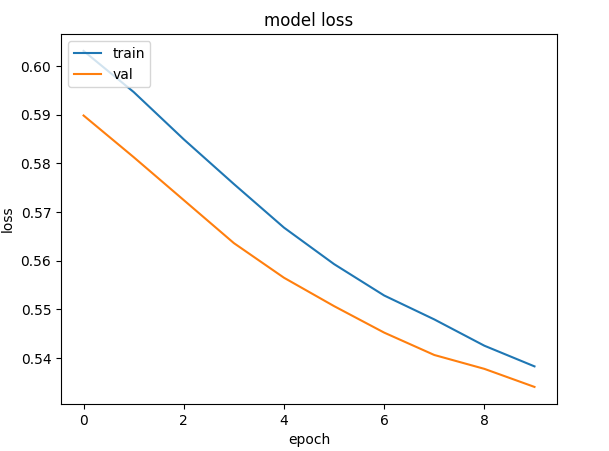

При model.fit(X_train, y_train, epochs=7, batch_size=32, validation_split=0.2)    model.add(Input(shape=(X_train.shape[1],)))
model.add(Dense(64,activation = 'relu'))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(8,activation = 'softmax'))
model.add(Dense(1,activation = 'sigmoid' ))                                                                  
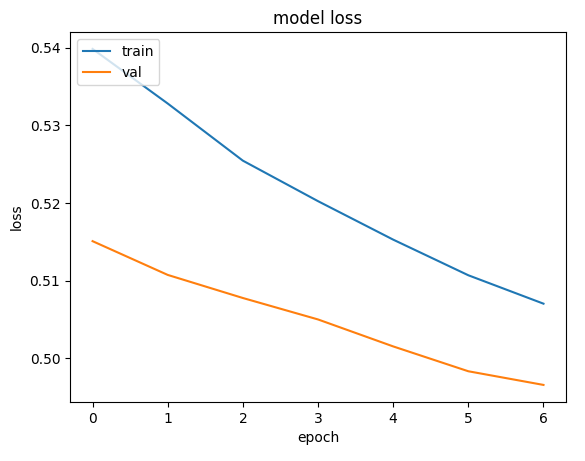

При history = model.fit(X_train, y_train, epochs=7, batch_size=32, validation_split=0.1)
model.add(Input(shape=(X_train.shape[1],)))
model.add(Dense(64,activation = 'relu'))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(2,activation = 'mish'))
model.add(Dense(1,activation = 'sigmoid' ))




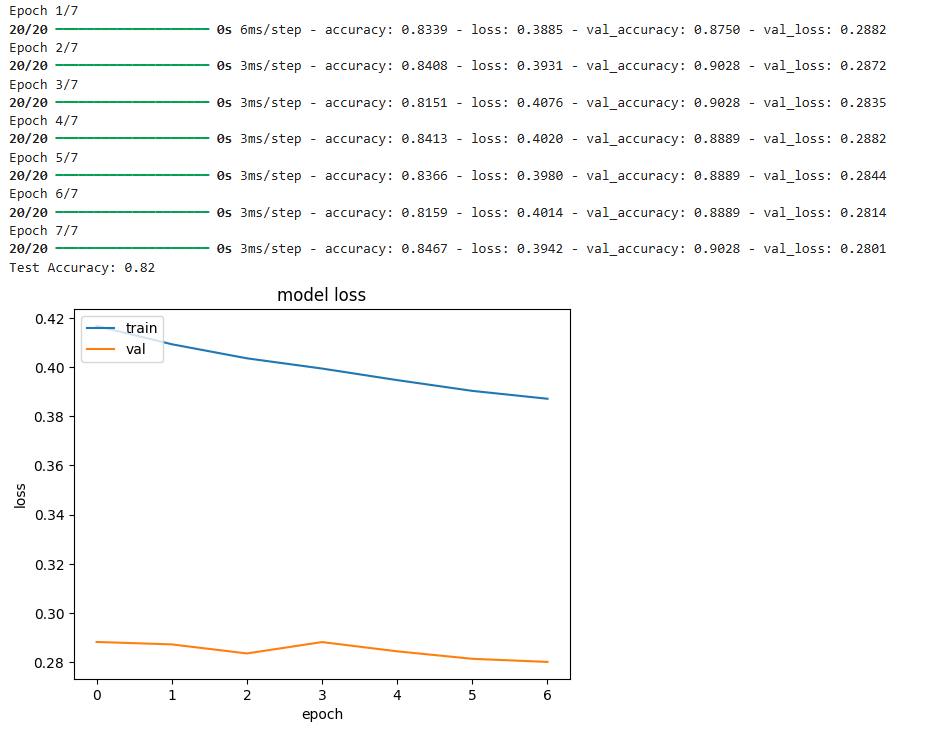